# Introduction to Programming Homework 11

### Due Friday Dec 23

You will turn in your homework **via GitHub**! Please use this link to start your repository :

https://classroom.github.com/assignment-invitations/c06b6582b98d7c605fb946360c5f5460

### Jupyter Notebooks

For this homework, you will create a `jupyter` notebook (formally known as `ipython` notebook). Here is how you launch `jupyter` :


* **Windows**
   * In the Windows search field, type in `jupyter`. You should see an app called Jupyter Notebook. After you launch it, you will at first see a black console appear and then your default browser will open a tab.

* **macOS and Linux**
   * Open a terminal and simply run `jupyter-notebook`. Your default browser will open a tab that looks like the image below.

<img src="jupyter_launch.png">

In the browser tab, go into the directory of your Homework 11 `git` repository.

In the top right hand corner you will see a drop-down menu called `new`. Click that and select the first entry under Notebooks.

A new tab with open with an `Untitled` notebook. Give it a name and save it.

In the notebook, you will see cells. We will only care about 2 types of cells :

* **Code**
   * in this type of cell, you can run `python` code
   * to execute the code, you hit SHIFT + ENTER
   
* **Markdown**
   * in this type of cell you can write text **and** (simple) LaTeX
   * to get a cell "processed", just hit SHIFT + ENTER

You can change a cell type with the drop-down menu.

Periodically save and commit your notebook (`.ipynb` file) and other data.

## Exercise 1 (Plotting)

We will only be graphing using `matplotlib`. If you want instructions on how to get `mayavi` working, please let me know.

Use the following import commands :

In [3]:
import numpy as np
from matplotlib import pyplot as plt
# the line below will allow embedding of 
# graphs in the notebook. if you use
# the ipython console, you don't need this
%matplotlib inline

* **a.** Start with the code

In [ ]:
def f(x, y):
    return (1 - x / 2 + x ** 5 + y ** 3) * np.exp(-x ** 2 -y ** 2)

n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
X, Y = np.meshgrid(x, y)

plt.contourf(X, Y, f(X, Y), 8, alpha=.75, cmap='jet')
plt.show()

Learn about contour plotting and modify the code to generate the image

<img src="sphx_glr_plot_contour_001.png" width=35%>

**Save your figure as a PNG file named "contour.png"**

**Hint :** look up `pyplot.contour`, `pyplot.clabel`, and don't forget to remove the x,y-ticks! 

* **b.** When using `pyplot`, there is a `figure` object kept the background onto which draw commands are executed. Because we are in `python`, we can can actually pass these objects around. The goal of this exercise will be to write a function that generates and returns a plot that look like :

<img src="regression.png">

Write a function called `regression_plot` with the following style

In [ ]:
def regression_plot(data, xvals = None, info = {}):
    fig = plt.figure()
    
    # your pyplot code similar to
    # what was in Lecture 11
    
    return fig

The `info` dictionary should include `'title'`,`'xlabel'`, and `'ylabel'`. The blue plot is data and the red line is the linear (least squares) regression.

Here are a few necessary hints :

* to get the statistical information, use `scipy.stats.linregress`
* to get the box outside the plot, use the keyword argument `box_to_anchor` with the command `pyplot.legend`

For example, the above image was generated using :

In [ ]:
info = {'title'  : 'Samples from normal pdf',
        'xlabel' : 'sample',
        'ylabel' : 'value',}
fig = regression_plot(np.random.randn(100), info = info)
fig.savefig('regression.png', bbox_inches='tight')

## Exercise 2 (Mandelbrot set)

In this exercise, we will write code to generate an image of the Mandelbrot set. Something like : 

<img src="mandelbrot.png" width=30%>

For $c \in \mathbb{C}$ and $z_0 \in \mathbb{C}$ consider the sequence $z_{n+1,c} = z_{n,c}^2 + c$. The Mandelbrot set is defined as $$\mathscr{M} = \{ c \in \mathbb{C} \mid  \limsup_{n \to \infty} \left|\,z_{n,c}\,\right| < \infty \}$$
Note that the starting point, $z_0$, can be chosen arbitrarily. Usually, people just use $z_0 = c$.

The points of interest of $\mathscr{M}$ will line in the square box $B = \{ x + i \, y \mid x \in [-2,1] \text{ and } y \in [-1.5,1.5] \}$. To compute, we will approximate $B$ by some finite number of points.

You will write a function called `compute_mandelbrot(num_iters, div_threshold, res)`.
* use `res` to divide **each axis** of $B$ into `res` number of points.

* use `num_iters` to stop generating $z_{n,c}$ when $n = $`num_iters`.

* use `div_threshold` to assume that $c \in \mathscr{M}$ if $\left|\,z_{\text{num_iters}\,,\,c}\,\right| < $ `div_threshold`

Your function should return a **boolean** `numpy` array `M` of shape `(res, res)` where `M[a,b] == True` if $c = (-2 + a \cdot res) + i \, (-1.5 + b \cdot res) \in \mathscr{M}$

**Save the image as a PNG using** `scipy.misc.imsave`.

Note : you might have to rotate flip the image and invert the colors. Also, be sure to **use the power on `numpy` arrays (i.e. compute all sequences together)**. You might get some overflow errors, but you can ignore those.

## Exercise 3 (Animating Tower of Hanoi)

In this exercise, you will animate a solution to the Tower of Hanoi problem. For this, we will use the built in `matplotlib` animation tools.

Go back to the old homework and pull the code for generating the series of states to solve Tower of Hanoi with `num_disks` disks.

Write a function of the form 

In [2]:
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from hanoi import solution_states

def hanoi_animation(n_disks):
    fig = plt.figure()
    hanoi_states = solution_states(n_disks)
    n_states = len(hanoi_states)

    def hanoi_frame(i):
        fig.clf()
        current_state = hanoi_states[i]
        # draw the current_state plot as needed
        #
        # no need to return anything

    anim = FuncAnimation(fig, hanoi_frame, frames = np.arange(0, n_states), interval = 300)
    plt.show()

** Before your code will work, you need to select Kernel in the Jupyter menu and choose Restart. Afterwards, do NOT rerun** `%matplotlib inline`. Afterwards, running

In [ ]:
hanoi_animation(3)

should open a window (possibly behind your browser window) showing your animation. **You will need to close the animation windows to be able to go back to work in Jupyter.**

## Exercise 4 (Spectral leakage and windowing)

This is a short exercise for to familiarize you with a concept.

Consider the following example :

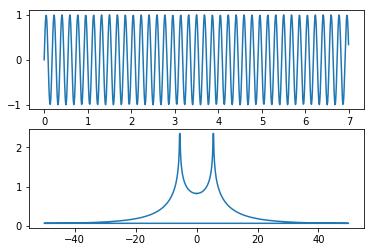

In [5]:
from scipy import fftpack

step = 1./100.
a = 0.
b = 7.
t = np.arange(a, b, step)

# our signal
f = np.sin(11 * np.pi * t)

# Fourier
F = fftpack.fft(f)

freq = fftpack.fftfreq(f.size, step)
log_power = np.log10(1. + np.abs(F))

# Plot
_ , (ax0, ax1) = plt.subplots(2, 1)

ax0.plot(t, f)
ax1.plot(freq, log_power)

plt.show()

As you can see, we are simply considering the function $f(t) = \sin(11 \, \pi \, t)$ over the interval $[0,7]$ (this has frequency $7.5$ Hz). However, in the discrete Fourier transform of our sample, we obtain many different frequencies.

* **a.** Explain why we are not just seeing a **clean** peak frequency of $7.5$ Hz.
   * **Hint :** it has something to do with the interval and periodicity.

* **b.**  The above problem is called **spectral leakage**. To fix these kind of issues, one can use **window functions** to make the actual signals more pronounced. The idea is to **smooth** the edges of your sampled signal.

    From `scipy.signal` import the `hamming` function. Look up the documentation. Use this to generate new data $g = f \cdot hamming$. Plot the `hamming` function, the new `g` function, and the log power of the discrete Fourier transform of $g$.

    As you can see, the signal is now much more concentrated.

## Reading (Image processing application)

This is completely optional. Look at "5.11.3 - 5.11.4 Image processing application: counting bubbles and unmolten grains" (on page 132 of the PDF version) of the SciPy Lecture Notes. You can try working out the problem yourself, or read the example solution.

## Package Managers (Getting `moviepy` and `mayavi` to work if you want)

This is also very optional, but if you want to save GIF images and movies, this is probably the easiest way.

Both the Anaconda Distribution and `python` itself come with programs called **package managers**. There is an long list of packages available for `python` that do many different tasks (e.g. `scipy`, `numpy`, `matplotlib` etc). The default install of the Anaconda Distribution comes with many packages pre-installed. However, if you want to add new pacakges (e.g. `moviepy` or `mayavi`) you should use a package manager. Packages usually depend on different versions of other packages. A **package manager** is a program that keeps track of all dependencies and helps you upgrade/downgrade your installation for compatibility.

The Anaconda Distribution comes with the package manager called `conda`. Also, with `python`, there is a common package manager called `pip`. Not all packages are available with `conda`, so we have to resolve ourselves to using `pip` once in a while.

To install `moviepy` and `mayavi`, you can try the following commands :

* Open up a terminal
   * on **Windows** open either the Anaconda Console (search in the windows search menu) or Babun.
   * on **Linux** or **macOS** open up a standard terminal.
   
* We are going to create a new **environment**. An (Anaconda) **environment** is a state in which we can install packages without messing with you main installation.
```bash
conda create -n qt4 python=3 pyqt=4 ipython-notebook --yes
```
* Once the environment is created, we need to activate it (i.e. we need to switch to the new state)
```bash
source activate qt4
```
* Now we need to install the plotting libraries we want : `matplotlib`, `mayavi` and `moviepy`. The versions will be important so compatibility reasons.
* To install `matplotlib` version `1.5.1` run :
```bash
conda install matplotlib=1.5.1
```
* To install `mayavi` version `4.5.0` run :
```bash
conda install -c menpo mayavi
```
   * Note : here, `menpo` is a user in the Anaconda Cloud who created a preconfigured package for us to use.
* To install `moviepy` version `0.2.2.11` run the following **two** commands :
```bash
pip install imageio==1.6
pip install moviepy
```
* Now that you have done this, you can run a Jupyter Notebook **inside the new environment**
```bash
jupyter-notebook
```
There, you will be able to use all the code from Lecture 11. Also, you will be able to make a GIF of your Tower of Hanoi problem with :

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

import moviepy.editor as mpy
from moviepy.video.io.bindings import mplfig_to_npimage

from hanoi import solution_states

def hanoi_frame(n, state):
    fig = plt.figure()
    
    ## Draw your figure
    
    return mplfig_to_npimage(fig)


def hanoi_gif(n):
    hanoi_states = solution_states(n)
    hanoi_frames = [ hanoi_frame(n, s) for s in hanoi_states ]
    clip = mpy.ImageSequenceClip(hanoi_frames, fps=2)
    clip_name = 'hanoi_solution_for_{}_disks.gif'.format(n)
    clip.write_gif(clip_name)

** Once you are done working, you should deactivate your environment with :**
```bash
source deactivate qt4
```